In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import optimize 
from scipy.special import erf
BOLD = '\033[1m'


In [48]:
# Input
M = 6
W = 15  
ath = 0.1
atv = 0.01
Ca = 8
Cd = 5 
Ct = 0.0
ga = 3.5

In [44]:
#Main code

def f_lm(x): # Liedl 2011- f(x) = 0
    return erf(W/(np.sqrt(4*ath*x)))*np.exp(-atv*x*(np.pi/(2*M))**2)-(np.pi/4)*((ga*Ct+Ca)/(ga*Cd + Ca)) 

def df_lm(x): # FD estimate df
    h = 1e-4
    return (f_lm(x+h) - f_lm(x-h))/(2*h)

def df_lm1(x): # exact df
    return -W/(2*x*np.sqrt(np.pi)*np.sqrt(atv*x))*np.exp(-(W**2)/(4*atv*x))*np.exp(-(np.pi**2*atv*x)/(4*M**2)) \
        - (1/(4*M**2))*np.pi**2*atv*np.exp((-np.pi**2*atv*x)/(4*M**2))*erf(W/(2*np.sqrt(atv*x)))  

def NR(x): # Newton Raphson simulation using FD
    iterat = 0
    tol = 1e-06
    h = f_lm(x)/df_lm(x)
    print("Iter. Nr ","", "Lmax","       " , " Residual")
    print('-'*35)   
    
    while abs(h)>= tol:
        h = f_lm(x)/df_lm(x) 
        x = x - h
        iterat+= 1 
        print(" ",iterat,  "    " , "%.4f "% x, "   " , "%.2e " %  h) 
        
def NR1(x): # Newton Raphson simulation using exact df
    iterat = 0
    tol = 1e-06
    h = f_lm(x)/df_lm1(x)
    print("Iter. Nr ","", "Lmax","       " , " Residual")
    print('-'*35)  
    
    while abs(h)>= tol:
        h = f_lm(x)/df_lm1(x) 
        x = x - h
        iterat+= 1
        print(" ",iterat,  "    " , "%.4f "% x, "   " , "%.2e " %  h)

print("{}The main functions".format(BOLD))

The main functions


The f(x) = 0 plot


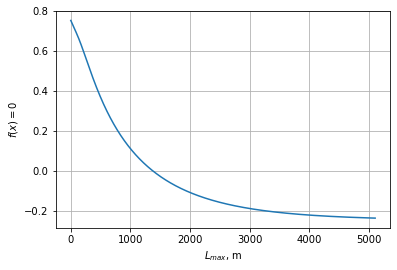

In [50]:
#f(x) = 0 Plot
print("{}The f(x) = 0 plot".format(BOLD))
x = np.linspace(1,5100, 1500)
y = f_lm(x)
plt.plot(x,y) 
plt.grid() 
plt.xlabel(r"$L_{max}$, m");
plt.ylabel(r"$f(x) = 0$");

In [51]:
# starting value
print("{}".format(BOLD))
Cf = (ga*Ct+Ca)/(ga*Cd+Ca)

ma_1 = -1/(np.pi*(ath/W**2)*np.log(1-0.25*np.pi*(Cf)))   
ma_2 = -2/(np.pi**2*(atv/M**2))*np.log(0.25*np.pi*(Cf))
ma_3 = 4/np.pi**2*(M**2/atv)*np.log(4/(np.pi*Cf)) # Liedl et al. 2005

min_x0 = np.minimum(ma_1, ma_2) # min starting value
max_x0 = np.minimum(np.maximum(ma_2, ma_3), ma_1)

print("The minimum starting value {0:2.2f} m".format(min_x0)) 
print("The maximum starting value {0:2.2f} m".format(max_x0))
 
if max_x0 == ma_3:
    print("The initial value is {0:2.2f} m".format(max_x0))
    x0 = max_x0
else:
    print("The initial value is {0:2.2f} m".format(min_x0))
    x0 = min_x0 
    


The minimum starting value 1021.90 m
The maximum starting value 2043.80 m
The initial value is 2043.80 m


In [52]:
# Results
BOLD = '\033[1m'

print("{}Result with estimated differntial".format(BOLD)) 
NR1(x0) # simulations using exact differential
print()

print("Result with exact differntial")
NR(x0)   # simulations using approximated differential 
print()

print("Result with Scipy code using SECANT method")
secant= optimize.newton(f_lm, x0)  # simulation using secant method
print("The Lmax is {0:2.3f} m".format(secant)) 

Result with estimated differntial
Iter. Nr   Lmax          Residual
-----------------------------------
  1      1390.8164      6.53e+02 
  2      1379.8435      1.10e+01 
  3      1378.4685      1.37e+00 
  4      1378.2946      1.74e-01 
  5      1378.2726      2.20e-02 
  6      1378.2698      2.79e-03 
  7      1378.2694      3.53e-04 
  8      1378.2694      4.47e-05 
  9      1378.2694      5.67e-06 
  10      1378.2694      7.18e-07 

Result with exact differntial
Iter. Nr   Lmax          Residual
-----------------------------------
  1      1092.0583      9.52e+02 
  2      1335.5086      -2.43e+02 
  3      1377.2657      -4.18e+01 
  4      1378.2688      -1.00e+00 
  5      1378.2694      -5.58e-04 
  6      1378.2694      -1.72e-10 

Result with Scipy code using SECANT method
The Lmax is 1378.269 m
